<a href="https://colab.research.google.com/github/raqueeb/nlp_bangla/blob/master/Chap_7_transformer_bangla_nlp_skeleton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "test" # জেসন ফাইল থেকে আইডিটা নিয়ে আসুন
os.environ['KAGGLE_KEY'] = "test123" # আপনার ক্যাগল কী

In [ ]:
!kaggle datasets files furcifer/bangla-newspaper-dataset

In [ ]:
!kaggle datasets download furcifer/bangla-newspaper-dataset -f data_v2/data_v2.json

In [ ]:
import json
with open('bert-ktrain/data_v2.json', encoding='utf-8') as f:
    datastore = json.load(f)



In [ ]:
sentences = []
labels = []

for item in datastore:
    sentences.append(item['content'])
    labels.append(item['category'])

In [ ]:
set(labels)

{'bangladesh',
 'economy',
 'education',
 'entertainient',
 'entertainment',
 'international',
 'life-style',
 'opinion',
 'sports',
 'technology'}

In [ ]:
categories = list(set(labels))

In [ ]:
categories

['technology',
 'life-style',
 'international',
 'bangladesh',
 'opinion',
 'entertainment',
 'entertainient',
 'economy',
 'education',
 'sports']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
  sentences, labels, test_size=0.2, random_state=42)

In [ ]:
!pip install git+https://github.com/amaiya/eli5@tfkeras_0_10_1

In [ ]:
import ktrain
from ktrain import text

In [ ]:
MODEL_NAME = 'neuralspace-reverie/indic-transformers-bn-distilbert'
t = text.Transformer(MODEL_NAME, maxlen=500)

In [ ]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 268
	95percentile : 669
	99percentile : 1079


Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 269
	95percentile : 669
	99percentile : 1075


In [ ]:
model = t.get_classifier()

In [ ]:
# ট্রেনিং করে নিচ্ছি
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=6)

simulating training for different learning rates... this may take a few moments...
Train for 54462 steps
21512/54462 [==========>...................] - ETA: 2:11:59 - loss: 0.5840 - accuracy: 0.8369

done.
Visually inspect loss plot and select learning rate associated with falling loss


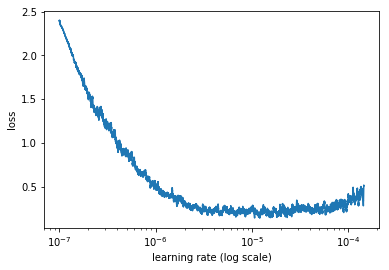

In [ ]:
%matplotlib inline
learner.lr_find(show_plot=True, max_epochs=1)

In [ ]:
learner.fit_onecycle(8e-5, 2)



begin training using onecycle policy with max lr of 8e-05...
Train for 54463 steps, validate for 2553 steps
Epoch 1/2
54463/54463 [==============================] - 14072s 258ms/step - loss: 0.2056 - accuracy: 0.9349 - val_loss: 0.2718 - val_accuracy: 0.9184
Epoch 2/2
54463/54463 [==============================] - 14112s 259ms/step - loss: 0.2209 - accuracy: 0.9332 - val_loss: 0.1923 - val_accuracy: 0.9389


In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=t)

In [ ]:
predictor.save('./bangla_news_predictor_kt')

In [ ]:
learner.model.save_pretrained('./bangla_news_predictor')

In [ ]:
learner.validate(class_names=t.get_classes())